<a href="https://colab.research.google.com/github/sreekarp/GAN_MNIST/blob/main/GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
#loading lib's
import keras
from keras.datasets import mnist

from keras.layers import *
from keras.layers import  LeakyReLU
from keras.models import Sequential , Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train , _), (_ ,_ ) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = (X_train-127.5)/127.5

In [ ]:
X_train.min()

-1.0

In [ ]:
total_epochs = 50
batch_size = 256
half_batch = 128

no_of_batches = int(X_train.shape[0]/batch_size)
noise_dim = 100

adam = Adam(lr = 2e-4 , beta_1 = 0.5)

In [ ]:
#generator model: upsampling

generator = Sequential()
generator.add(Dense(units = 7*7*128, input_shape = (noise_dim,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#(7,7,128) -> (14,14,64)

generator.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding = 'same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#(14,14,64) -> (28,28,1)
generator.add(Conv2DTranspose(1, (3,3), strides=(2,2), padding = 'same', activation = 'tanh'))


generator.compile(loss = keras.losses.binary_crossentropy, optimizer= adam)

generator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6272)              633472    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 7, 7, 128)         0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 128)        512       
 ormalization)                                                   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       73792     
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)       

In [ ]:
#Discriminator Model
#Downsampling

discriminator = Sequential()
discriminator.add(Conv2D(64,kernel_size=(3,3), strides=(2,2) ,padding= 'same', input_shape = (28,28,1)))

discriminator.add(LeakyReLU(0.2))

#(14,14,64) -> (7,7,128)
discriminator.add(Conv2D(128,kernel_size=(3,3), strides=(2,2),padding= 'same'))
discriminator.add(LeakyReLU(0.2))

#(7,7,128) -> 6272
discriminator.add(Flatten())
discriminator.add(Dense(100))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss = keras.losses.binary_crossentropy, optimizer= adam)

discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               627300    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 100)              

In [ ]:
## combining models

discriminator.trainable = False

gan_input = Input(shape = (noise_dim, ))

generated_img = generator(gan_input)

gan_output = discriminator(generated_img)

#functional API

model = Model(gan_input, gan_output)

model.compile(loss = keras.losses.binary_crossentropy, optimizer = adam)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_3 (Sequential)   (None, 28, 28, 1)         708609    
                                                                 
 sequential_5 (Sequential)   (None, 1)                 701897    
                                                                 
Total params: 1,410,506
Trainable params: 708,225
Non-trainable params: 702,281
_________________________________________________________________


In [ ]:
X_train = X_train.reshape(-1,28,28,1)

In [ ]:

X_train.shape

(60000, 28, 28, 1)

In [ ]:
def display(samples = 25):

  noise  = np.random.normal(0,1,size=(samples, noise_dim))

  generated_img = generator.predict(noise)
  plt.figure(figsize = (10,10))
  for i in range(samples):
    plt.subplot(5,5,i+1)
    plt.imshow(generated_img[i].reshape(28,28), cmap = "binary")
    plt.axis()

plt.show()

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 4ms/step
Epoch 29, Disc loss 0.5547384927924882, Generator loss 1.5685331923329933
4/4 [==============================] - 0s 3ms/step
Epoch 30, Disc loss 0.5469232109876779, Generator loss 1.5854895476602082
4/4 [==============================] - 0s 3ms/step
Epoch 31, Disc loss 0.5447720668764195, Generator loss 1.6165759099854364
4/4 [==============================] - 0s 3ms/step
Epoch 32, Disc loss 0.54328448115251, Generator loss 1.6210169486510448
4/4 [==============================] - 0s 4ms/step
Epoch 33, Disc loss 0.5393683043045875, Generator loss 1.6478756900526519
4/4 [==============================] - 0s 5ms/step
Epoch 34, Disc loss 0.5359697868554001, Generator loss 1.66050558976638
4/4 [==============================] - 0s 5ms/step
Epoch 35, Disc loss 0.5345780556527977, Generator loss 1.6818872094154358
4/4 [==============================] - 0s 4ms/step
Epoch 36, Disc loss 0.53439

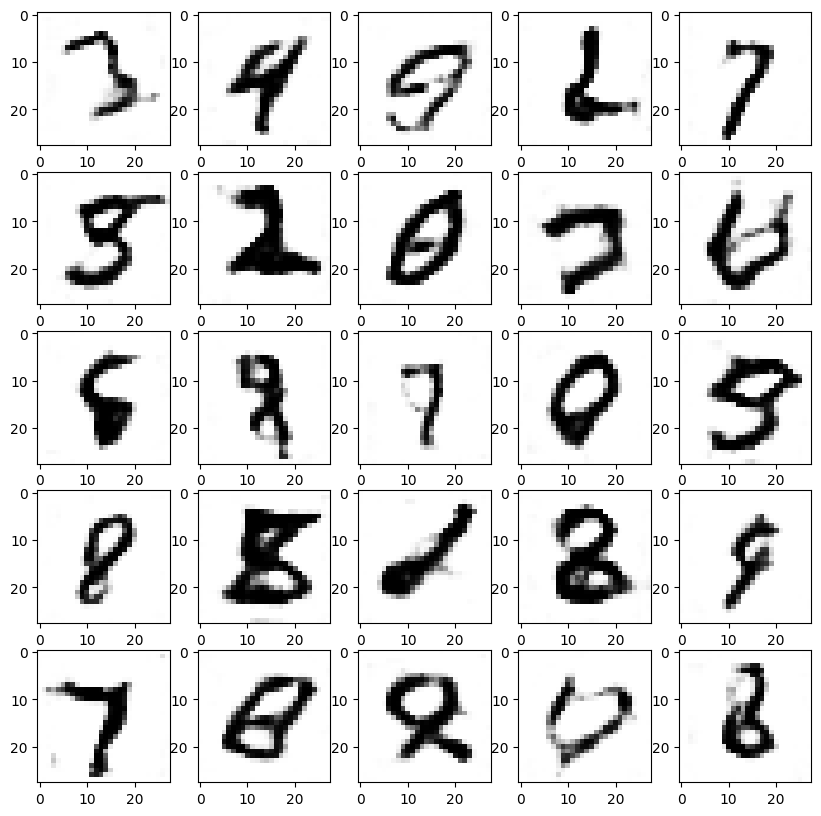

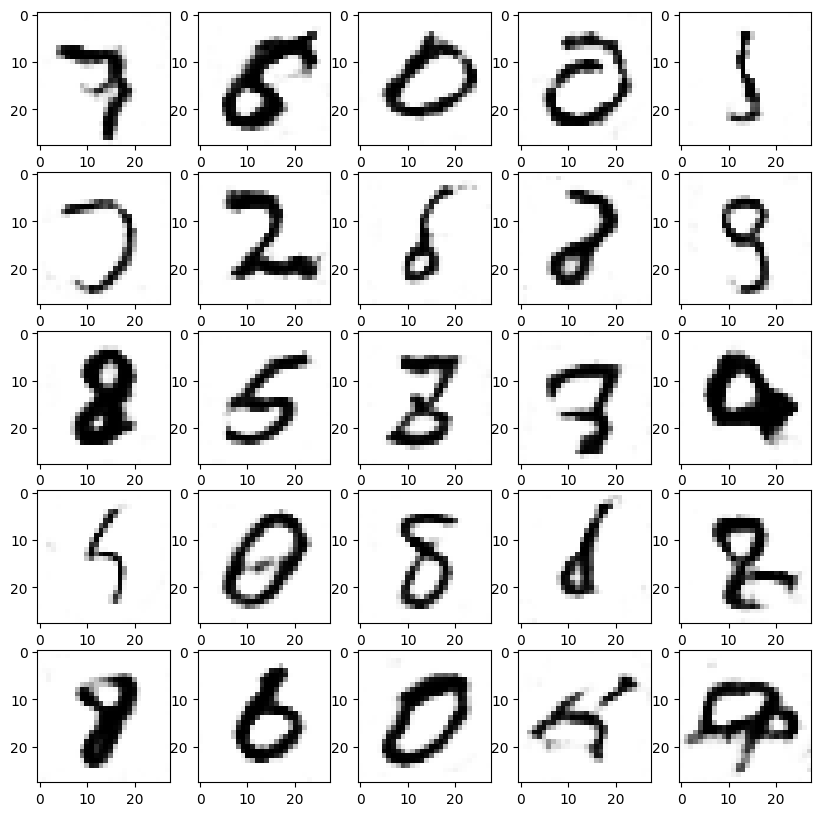

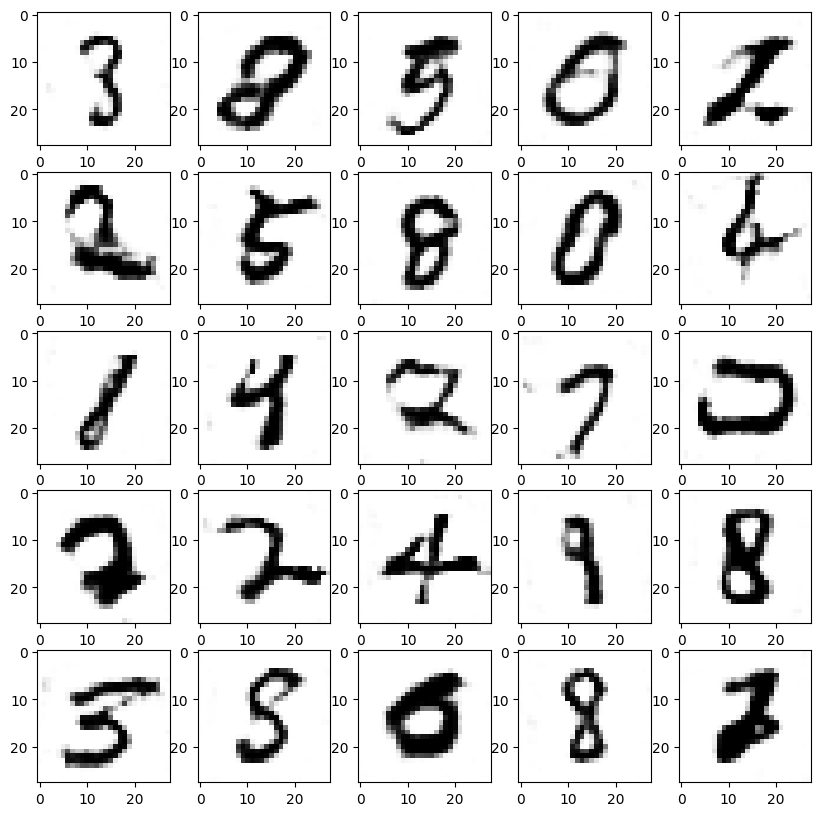

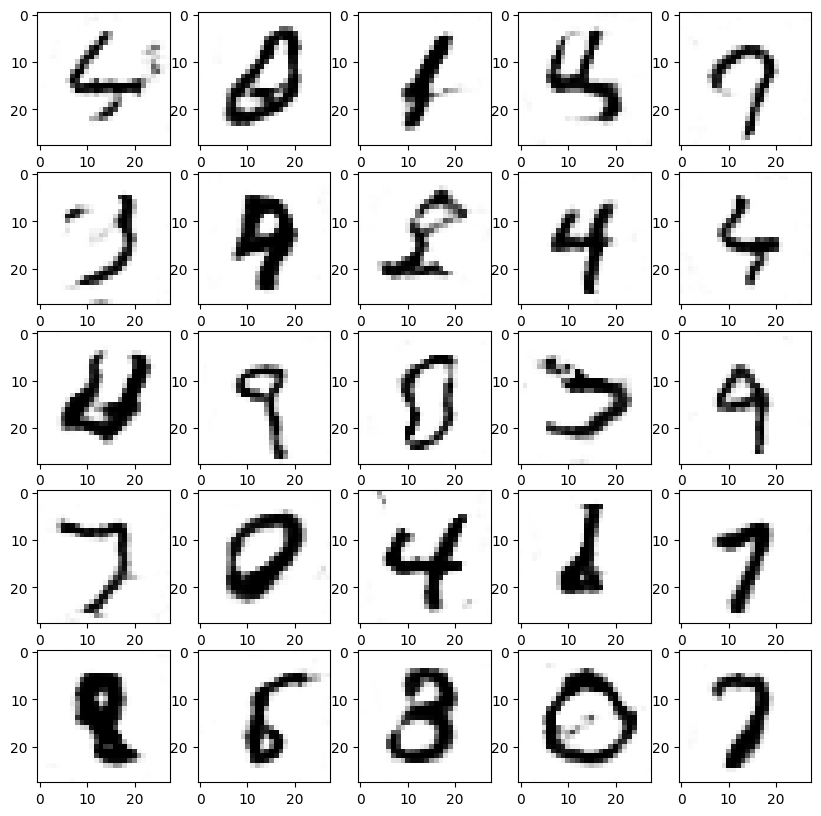

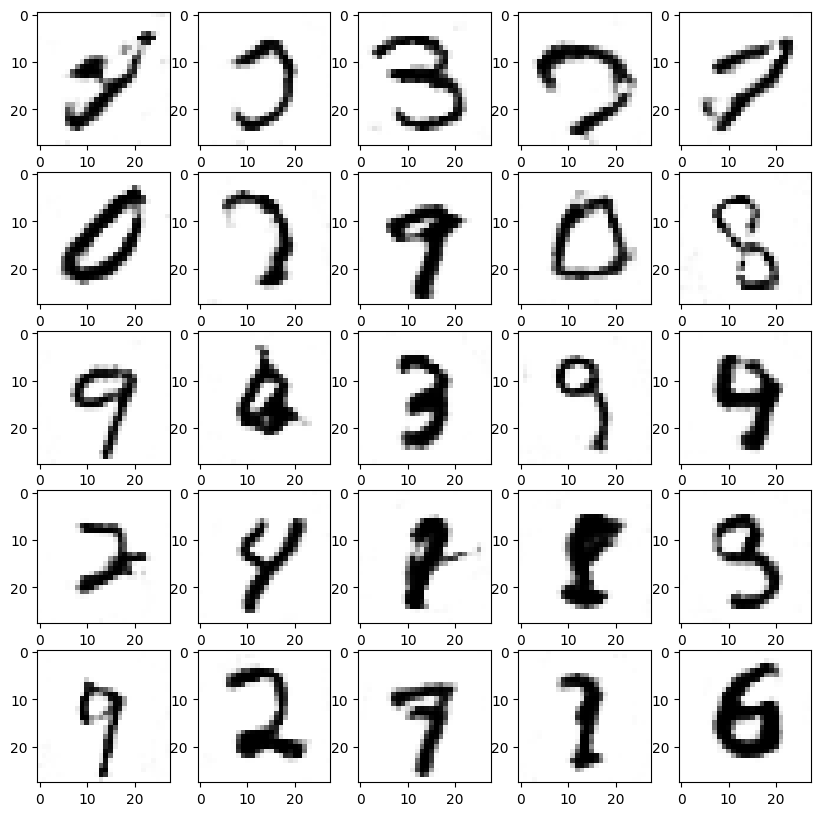

In [ ]:

# Initialize d_losses and g_losses
d_losses = []
g_losses = []



for epoch in range(total_epochs):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0

    for step in range(no_of_batches):
        # Training discriminator
        discriminator.trainable = True

        idx = np.random.randint(0, 60000, half_batch)
        real_imgs = X_train[idx]

        noise = np.random.normal(0, 1, size=(half_batch, noise_dim))
        fake_imgs = generator.predict(noise)

        real_y = np.ones((half_batch, 1)) * 0.9
        fake_y = np.zeros((half_batch, 1))

        d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_y)

        d_loss = 0.5 * (d_loss_real + d_loss_fake)
        epoch_d_loss += d_loss

        # Training generator
        discriminator.trainable = False

        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        ground_truth_y = np.ones((batch_size, 1))
        g_loss = model.train_on_batch(noise, ground_truth_y)

        epoch_g_loss += g_loss

    print(f"Epoch {epoch+1}, Disc loss {epoch_d_loss / no_of_batches}, Generator loss {epoch_g_loss / no_of_batches}")

    d_losses.append(epoch_d_loss / no_of_batches)
    g_losses.append(epoch_g_loss / no_of_batches)

    if (epoch + 1) % 10 == 0:
        generator.save("generator.h5")
        display()
# Outside the loop, you can display or analyze the losses
# And also perform any necessary cleanup or final actions
